/hdd1/envs/tf_env/envs/tf/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-10-27 16:38:46.802133: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-27 16:38:46.802332: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-27 16:38:47.001168: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-27 16:38:47.002310: I tensorflow/stream_executor/cuda/cuda_gpu_execu

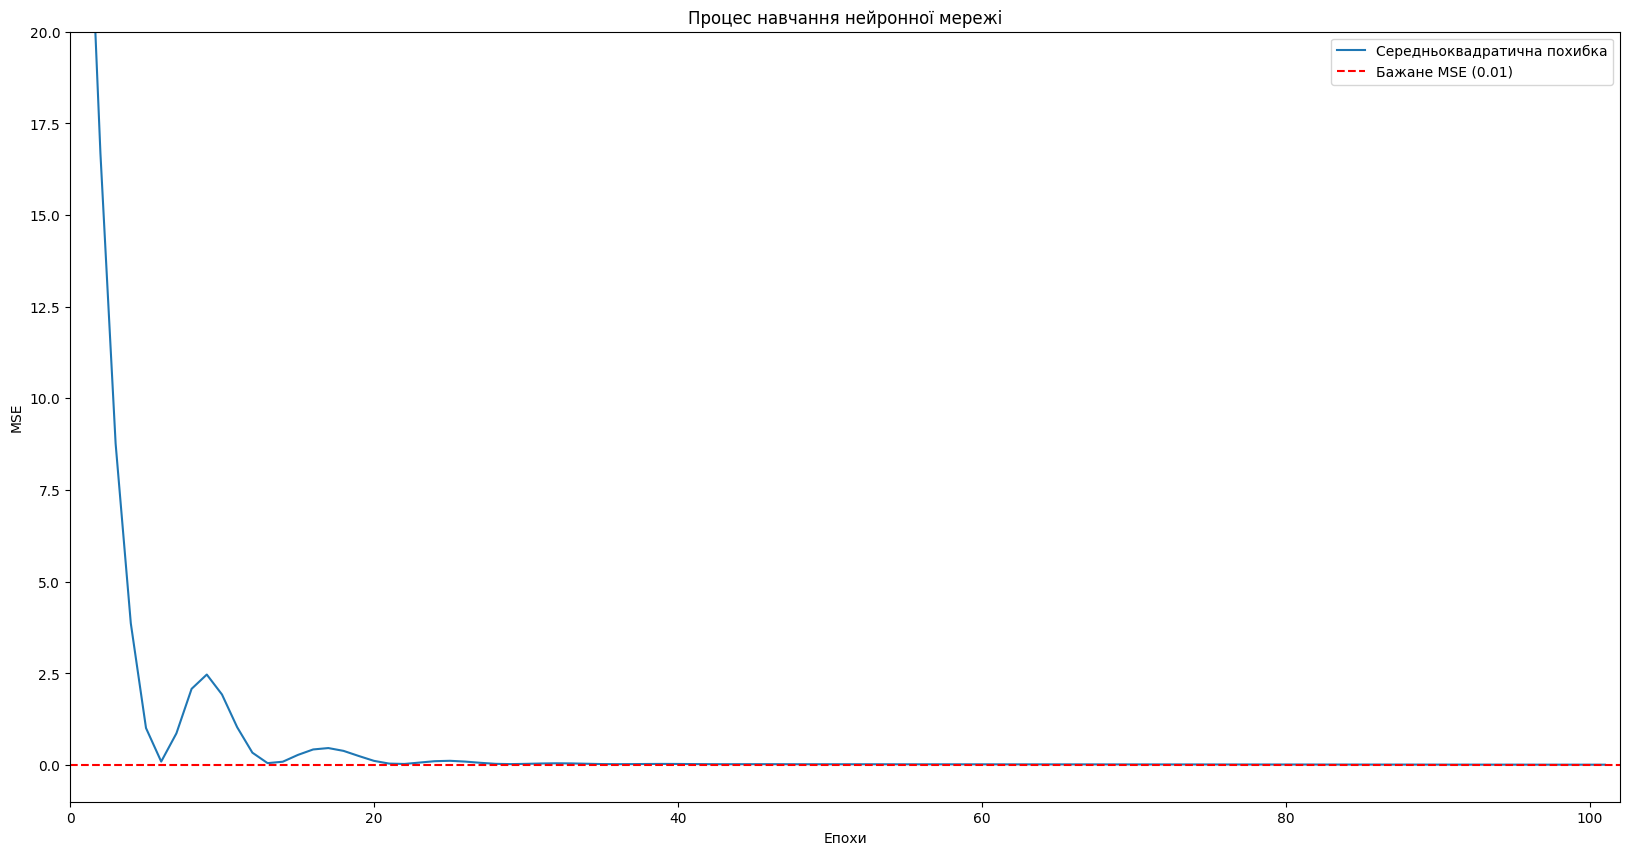

6/6 [==============================] - 0s 2ms/step


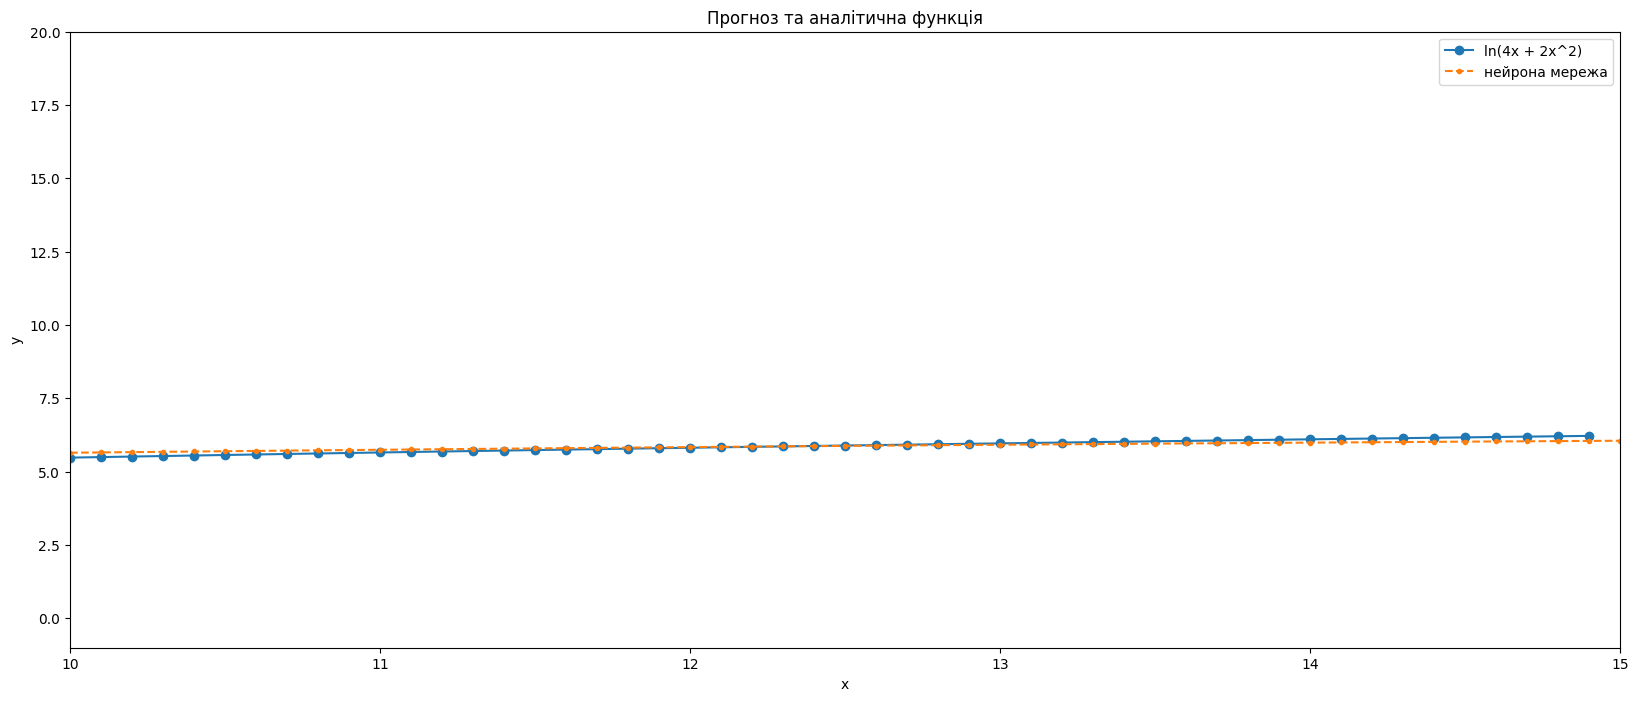

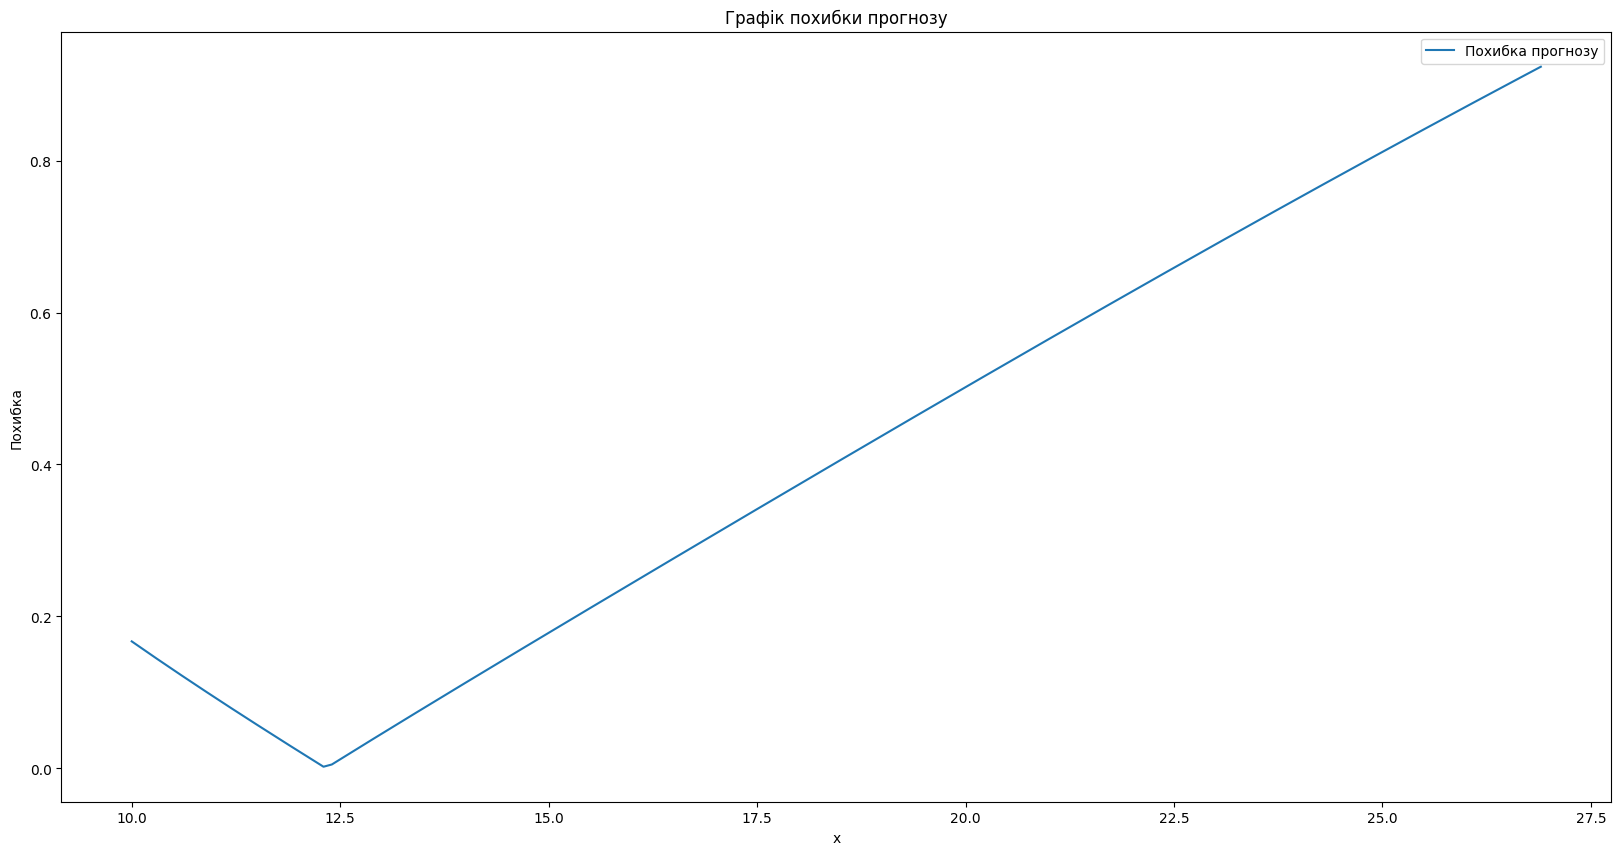

Модель: <keras.engine.sequential.Sequential object at 0x7f86c9b2e820>
Кількість епох: 102
Останнє значення втрат: 0.009883974678814411
Бажане значення MSE: 0.01


In [1]:
# Імпорт необхідних бібліотек
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Крок 1: Реалізація аналітичної функції
def analytic_function(x):
    return np.log(4 * x + 2 * x ** 2)

target_mse = 0.01       # Бажане значення середньоквадратичної похибки

# Генерація даних для навчання
x_train = np.arange(10, 15, 0.1)        # Інтервал значень аргументів для навчання
y_train = analytic_function(x_train)    # Значення y, обчислені за аналітичною функцією

# Крок 2: Налаштування архітектури нейронної мережі
model = Sequential(
    [
        Dense(32, activation='sigmoid', input_shape=(1,)),  # Перший шар з 32 нейронами, функція активації: сигмоїда
        Dense(16, activation='relu'),                       # Другий шар з 16 нейронами, функція активації: ReLU
        Dense(1)                                            # Вихідний шар з 1 нейроном
    ]
)

# Компіляція моделі з MSE як функцією втрат
model.compile(
    optimizer=Adam(learning_rate=0.01),  # Оптимізатор: Adam
    loss='mse'                           # Функція втрат: MSE
)

# Крок 4: Навчання моделі до досягнення бажаного MSE
training_history = []       # Список для зберігання історії навчання
current_mse = float('inf')  # Ініціалізація значення MSE
epoch_when_reach_mse = 0    # Етап, на якому досягнуто бажаного MSE

for epoch in range(100_000):
    # Навчання моделі на такій кількості епох, які потрібні для досягнення MSE
    training_history.append(model.fit(x_train, y_train, epochs=1, verbose=0))
    current_mse = model.evaluate(x_train, y_train, verbose=0)  # Оцінка моделі

    if current_mse <= target_mse:  # Перевірка, чи досягнуто бажаного MSE
        epoch_when_reach_mse = epoch + 1  # +1, щоб відобразити номер епохи
        break

# Графік навчання
plt.figure(figsize=(20, 10))
plt.plot([h.history['loss'][0] for h in training_history], label='Середньоквадратична похибка')  # Відображення значень похибки
plt.axhline(y=target_mse, color='r', linestyle='--', label=f'Бажане MSE ({target_mse})')  # Лінія для бажаного MSE
plt.xlabel('Епохи')
plt.ylabel('MSE')
plt.ylim(-1, 20)  # Обмеження по осі Y
plt.xlim(0, epoch_when_reach_mse)   # Обмеження по осі X
plt.legend()
plt.title("Процес навчання нейронної мережі")
plt.show()

# Крок 5: Прогнозування ряду значень функції
x_test = np.arange(10, 27, 0.1)     # Інтервал значень аргументів для тестування
y_test = analytic_function(x_test)  # Значення y для тестових x
y_pred = model.predict(x_test)      # Прогнозовані значення

# Крок 6: Відображення результатів
plt.figure(figsize=(20, 8))
plt.plot(x_train, y_train, label="ln(4x + 2x^2)", marker='o')                   # Графік аналітичної функції
plt.plot(x_test, y_pred, label="нейронa мережa", linestyle='--', marker='.')    # Графік прогнозів нейронної мережі
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-1, 20)  # Обмеження по осі Y
plt.xlim(10, 15)  # Обмеження по осі X
plt.legend()
plt.title("Прогноз та аналітична функція")
plt.show()

# Відображення похибки
plt.figure(figsize=(20, 10))
error = np.abs(y_test - y_pred.flatten())           # Обчислення абсолютної похибки
plt.plot(x_test, error, label="Похибка прогнозу")   # Графік похибки прогнозу
plt.xlabel("x")
plt.ylabel("Похибка")
plt.legend()
plt.title("Графік похибки прогнозу")
plt.show()

# Виведення результатів
print("Модель:", model)                             # Виведення інформації про модель
print("Кількість епох:", len(training_history))     # Кількість епох
print("Останнє значення втрат:", current_mse)       # Останнє значення MSE
print("Бажане значення MSE:", target_mse)           # Бажане значення MSE